# Парсер HeadHunter
## Цель проекта:
Создать парсер, чтобы получать вакансии под свои запросы поиска


### Импорт библиотек

In [1]:
import requests
import pandas as pd
import numpy as np

import json

from datetime import datetime, timedelta
import time
import os
from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
from typing import Union

import matplotlib.pyplot as plt
import seaborn as sns

### Делаем выгрузку из HeadHunter
Создадим необходимые константы: BASE_URL
<br>Добавим перечень требуемых вакансий

In [2]:
BASE_URL = "https://api.hh.ru/"

TEXT = f'SQL NAME:("Аналитик" or "Analyst" or "BI" or "Business Intelligence" or "Data Scientist" or "Data Analyst" or "Системный/бизнес-аналитик" or "Системный аналитик")'

dt_now = datetime.now().date()
dt_from = dt_now - timedelta(days=7)
DATE_TO = dt_now.isoformat() #API в формате ISO 8601 YYYY-MM-DD или YYYY-MM-DDThh:mm:ss±hhmm
DATE_FROM = dt_from.isoformat()

VAC_URL = BASE_URL + f'vacancies?text={TEXT}&date_from={DATE_FROM}&date_to={DATE_TO}&responses_count_enabled=True&per_page=100'

In [3]:
# Cоздаем датафрейм в который будем сохранять наши данные

vacancy_df = pd.DataFrame() 

В выдаче API HH нет опыта работы, поэтому мы укажем его в запросе самостоятельно

In [4]:
# Название категорий опыта (особое внимание к первым двум пунктам)

experiences = ['noExperience',
               'between1And3',
               'between3And6', 
               'moreThan6']

Напишем цикл для направления запросов к API

In [5]:
# Количество страниц вакансий по категориям опыта

for exp in experiences:
    page = 0
    url = VAC_URL + f'&experience={exp}'
    try:
        r = requests.get(url + f'&page={page}')
        data = json.loads(r.text) 
        print(exp, '-', data ['pages'])
        items = data['items']
    except Exception as e:
        print(e)

noExperience - 3
between1And3 - 20
between3And6 - 9
moreThan6 - 1


In [6]:
# Вывод перечня вакансий с данными по столбцам

for exp in experiences:
    page = 0
    url = VAC_URL + f'&experience={exp}'
    try:
        r = requests.get(url + f'&page={page}')
        data = json.loads(r.text)
        items = data['items']
        for page in range(1, data ['pages']):
            r = requests.get(url + f'&page={page}')
            data = json.loads(r.text)
            items += data['items']
        df = pd.DataFrame(items)
        df['experience'] = exp
        vacancy_df = pd.concat([vacancy_df, df])
    except Exception as e:
        print(exp, '-',e)
        time.sleep(5)

In [7]:
# Столбцы с типами данных

vacancy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3147 entries, 0 to 26
Data columns (total 30 columns):
id                          3147 non-null object
premium                     3147 non-null bool
name                        3147 non-null object
department                  449 non-null object
has_test                    3147 non-null bool
response_letter_required    3147 non-null bool
area                        3147 non-null object
salary                      608 non-null object
type                        3147 non-null object
address                     1599 non-null object
response_url                0 non-null object
sort_point_distance         0 non-null object
published_at                3147 non-null object
created_at                  3147 non-null object
archived                    3147 non-null bool
apply_alternate_url         3147 non-null object
insider_interview           16 non-null object
url                         3147 non-null object
alternate_url               314

In [8]:
vacancy_df.head(3)  

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience
0,52059152,False,Системный аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Преображенская п...",...,"{'id': '4170597', 'name': 'ЭЛТ-ПОИСК', 'url': ...","{'requirement': 'Коммуникативные навыки, умени...",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 18},[],[],[],False,noExperience
1,52361035,False,Medical Data Analyst / Медицинский аналитик,None,False,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Минск', 'street': 'улица Мельникайте...",...,"{'id': '4424273', 'name': 'Одиссеус Дата Серви...",{'requirement': 'Знание <highlighttext>SQL</hi...,None,"{'id': 'flexible', 'name': 'Гибкий график'}",{'responses': 1},[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...",[],False,noExperience
2,50344878,False,Начинающий системный аналитик / Junior system ...,None,False,True,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 35000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Ростов-на-Дону', 'street': 'Обсерват...",...,"{'id': '681319', 'name': 'ЗАЗЕКС', 'url': 'htt...","{'requirement': 'Будет большим плюсом, но не о...",None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 10},[],[],[],False,noExperience


In [9]:
#Сброс индексов 

vacancy_df.reset_index(drop=True, inplace=True)

In [10]:
vacancy_df.tail(3)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer,snippet,contacts,schedule,counters,working_days,working_time_intervals,working_time_modes,accept_temporary,experience
3144,51056038,False,Старший Специалист Power BI,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'МКАД, 72-й килом...",...,"{'id': '42419', 'name': 'Mareven Food Central'...",{'requirement': 'Устойчивые знания средств раз...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 0},[],[],[],False,moreThan6
3145,50185357,False,Аналитик-Консультант 1С ERP (Бухгалтерия),None,False,False,"{'id': '2', 'name': 'Санкт-Петербург', 'url': ...","{'from': 150000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Санкт-Петербург', 'street': 'Пражска...",...,"{'id': '28435', 'name': 'Группа компаний БТК',...",{'requirement': '...описания <highlighttext>би...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 1},[],[],[],False,moreThan6
3146,52293949,False,Продуктовый аналитик (команда монетизации плат...,"{'id': 'mailru-15478-other', 'name': 'VK'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,"{'id': '15478', 'name': 'VK', 'url': 'https://...",{'requirement': 'Имеешь опыт работы в <highlig...,None,"{'id': 'fullDay', 'name': 'Полный день'}",{'responses': 1},[],[],[],False,moreThan6


### Вытащим информацию из словарей

In [11]:
#Поиск по id

def return_id(x, key='id', nan_value=np.nan):
    try:
        return x[key]
    except Exception as e:
        return nan_value

In [12]:
#Выбор важных столбцов по ключу

vacancy_df['employer_name'] = vacancy_df['employer'].apply(return_id, key='name')
vacancy_df['department_name'] = vacancy_df['department'].apply(return_id, key='name')
vacancy_df['salary_from'] = vacancy_df['salary'].apply(return_id, key='from')
vacancy_df['salary_to'] = vacancy_df['salary'].apply(return_id, key='to')
vacancy_df['city'] = vacancy_df['area'].apply(return_id, key='name')
vacancy_df['metro_name'] = vacancy_df['address'].apply(return_id, key='metro')
vacancy_df['station_name'] = vacancy_df['metro_name'].apply(return_id, key='station_name')
vacancy_df['line_name'] = vacancy_df['metro_name'].apply(return_id, key='line_name')
vacancy_df['address_street'] = vacancy_df['address'].apply(return_id, key='street')
vacancy_df['responses'] = vacancy_df['counters'].apply(return_id, key='responses')

In [13]:
vacancy_df.head(3)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer_name,department_name,salary_from,salary_to,city,metro_name,station_name,line_name,address_street,responses
0,52059152,False,Системный аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Преображенская п...",...,ЭЛТ-ПОИСК,NaN,NaN,NaN,Москва,None,NaN,NaN,Преображенская площадь,18
1,52361035,False,Medical Data Analyst / Медицинский аналитик,None,False,False,"{'id': '1002', 'name': 'Минск', 'url': 'https:...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Минск', 'street': 'улица Мельникайте...",...,Одиссеус Дата Сервисес,NaN,NaN,NaN,Минск,None,NaN,NaN,улица Мельникайте,1
2,50344878,False,Начинающий системный аналитик / Junior system ...,None,False,True,"{'id': '76', 'name': 'Ростов-на-Дону', 'url': ...","{'from': 35000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Ростов-на-Дону', 'street': 'Обсерват...",...,ЗАЗЕКС,NaN,35000.0,NaN,Ростов-на-Дону,None,NaN,NaN,Обсерваторная улица,10


In [14]:
# Перечень городов ('city')

vacancy_df['city'].unique()

array(['Москва', 'Минск', 'Ростов-на-Дону', 'Новосибирск',
       'Санкт-Петербург', 'Нижний Новгород', 'Киев', 'Алматы',
       'Нижневартовск', 'Уфа', 'Нур-Султан', 'Самара', 'Воронеж', 'Пермь',
       'Саратов', 'Караганда', 'Казань', 'Львов', 'Кипр',
       'Киров (Кировская область)', 'Екатеринбург', 'Ярославль',
       'Калининград', 'Волгоград', 'Краснодар', 'Щелково',
       'Иваново (Ивановская область)', 'Томск', 'Красноярск', 'Таганрог',
       'Белая Церковь', 'Хабаровск', 'Кемерово', 'Балашиха', 'Ижевск',
       'Владимир', 'Владивосток', 'Челябинск', 'Днепр (Днепропетровск)',
       'Польша', 'Тольятти', 'Кострома', 'Серпухов', 'Харьков', 'Рязань',
       'Тюмень', 'Чебоксары', 'Омск', 'Новокузнецк', 'Пенза', 'Барнаул',
       'Зеленоград', 'Химки', 'Майкоп', 'Тула', 'Иннополис', 'Череповец',
       'Курск', 'Симферополь', 'Липецк', 'Ташкент', 'Дубна', 'Саранск',
       'Тверь', 'Бейнеу (Мангистауская обл)', 'Жансугуров', 'Чита',
       'Благовещенск (Амурская область)', 

In [15]:
# Выбор вакансии только по г.Москва

vacancy_df_msk = vacancy_df[vacancy_df.loc[:,"city"].isin(["Москва"])]

In [16]:
vacancy_df_msk.tail(3)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer_name,department_name,salary_from,salary_to,city,metro_name,station_name,line_name,address_street,responses
3143,50574062,False,Менеджер по коммерческой и рыночной аналитике,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Электрозаводская...",...,DPD в России,NaN,NaN,NaN,Москва,"{'station_name': 'Преображенская площадь', 'li...",Преображенская площадь,Сокольническая,Электрозаводская улица,6
3144,51056038,False,Старший Специалист Power BI,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'МКАД, 72-й килом...",...,Mareven Food Central,NaN,NaN,NaN,Москва,"{'station_name': 'Сходненская', 'line_name': '...",Сходненская,Таганско-Краснопресненская,"МКАД, 72-й километр, внешняя сторона",0
3146,52293949,False,Продуктовый аналитик (команда монетизации плат...,"{'id': 'mailru-15478-other', 'name': 'VK'}",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,VK,VK,NaN,NaN,Москва,NaN,NaN,NaN,NaN,1


In [17]:
# Выбор вакансии только по опыту работы до 3-х лет (около 1200)

vacancy_df_to3years = vacancy_df_msk[vacancy_df_msk.loc[:,"experience"].isin(["noExperience", "between1And3"])]

In [18]:
# Столбцы с типами данных

vacancy_df_to3years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 2234
Data columns (total 40 columns):
id                          1175 non-null object
premium                     1175 non-null bool
name                        1175 non-null object
department                  216 non-null object
has_test                    1175 non-null bool
response_letter_required    1175 non-null bool
area                        1175 non-null object
salary                      184 non-null object
type                        1175 non-null object
address                     678 non-null object
response_url                0 non-null object
sort_point_distance         0 non-null object
published_at                1175 non-null object
created_at                  1175 non-null object
archived                    1175 non-null bool
apply_alternate_url         1175 non-null object
insider_interview           9 non-null object
url                         1175 non-null object
alternate_url               117

In [19]:
# Количество незаполненных значений по столбцам

vacancy_df_to3years.isna().sum()

id                             0
premium                        0
name                           0
department                   959
has_test                       0
response_letter_required       0
area                           0
salary                       991
type                           0
address                      497
response_url                1175
sort_point_distance         1175
published_at                   0
created_at                     0
archived                       0
apply_alternate_url            0
insider_interview           1166
url                            0
alternate_url                  0
relations                      0
employer                       0
snippet                        0
contacts                    1175
schedule                       0
counters                       0
working_days                   0
working_time_intervals         0
working_time_modes             0
accept_temporary               0
experience                     0
employer_n

In [20]:
vacancy_df_to3years.tail(3)

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer_name,department_name,salary_from,salary_to,city,metro_name,station_name,line_name,address_street,responses
2230,52288615,False,Главный аналитик в департамент по работе с про...,"{'id': '2492-2492-14883', 'name': 'Московский ...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Очаковское шоссе...",...,Московский Кредитный Банк,Московский Кредитный Банк. Профессионалы,NaN,NaN,Москва,"{'station_name': 'Кунцевская', 'line_name': 'А...",Кунцевская,Арбатско-Покровская,Очаковское шоссе,6
2233,52160191,False,Менеджер по стратегии и развитию регионов / ан...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Краснопролетарск...",...,билайн,NaN,NaN,NaN,Москва,None,NaN,NaN,Краснопролетарская улица,51
2234,44141540,False,Архитектор BI ( аналитических и прогнозных реш...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пресненская набе...",...,УРАЛХИМ,NaN,NaN,NaN,Москва,"{'station_name': 'Выставочная', 'line_name': '...",Выставочная,Филевская,Пресненская набережная,1


### Про дубликаты

In [21]:
# Проверка выборки на наличие дубликатов (около 90)

vacancy_df_to3years[vacancy_df_to3years.duplicated(['employer_name', 'name', 'city'], keep=False)][
['employer_name', 'name', 'city', 'experience']].sort_values(by=['name'])

,employer_name,name,city,experience
1347,ИЦ АЙ-ТЕКО,Data Scientist,Москва,between1And3
1349,ИЦ АЙ-ТЕКО,Data Scientist,Москва,between1And3
737,РобоФинанс,Data Scientist (Fintech),Москва,between1And3
734,РобоФинанс,Data Scientist (Fintech),Москва,between1And3
1535,Банк ДОМ.РФ,Quantitative analyst,Москва,between1And3
...,...,...,...,...
529,Займ-Экспресс,Скоринг-аналитик / Data scientist / Аналитик (...,Москва,between1And3
2203,Тинькофф,Старший аналитик на развитие моделей принятия ...,Москва,between1And3
2202,Тинькофф,Старший аналитик на развитие моделей принятия ...,Москва,between1And3
747,"Иннотех, Группа компаний",Финансовый аналитик (Источники данных),Москва,between1And3


In [22]:
# Пример дубликатов

vacancy_df_to3years.loc[[1347, 1349]]

# Необходимо постоянно обновлять индексы!!!

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer_name,department_name,salary_from,salary_to,city,metro_name,station_name,line_name,address_street,responses
1347,52218639,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,ИЦ АЙ-ТЕКО,NaN,NaN,NaN,Москва,"{'station_name': 'Деловой центр', 'line_name':...",Деловой центр,МЦК,Кутузовский проспект,20
1349,52219113,False,Data Scientist,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Кутузовский прос...",...,ИЦ АЙ-ТЕКО,NaN,NaN,NaN,Москва,"{'station_name': 'Деловой центр', 'line_name':...",Деловой центр,МЦК,Кутузовский проспект,37


### Посмотрим компании, предлагающие вакансии, а также требуемый опыт работы

Text(0.5, 1.0, 'Вакансии по опыту работы')

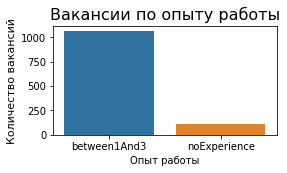

In [23]:
# Гистограмма вакансий по опыту работу (около 1200)

experience = (vacancy_df_to3years['experience']).value_counts().head()

plt.figure(figsize=(4,2))
sns.barplot(x=experience.index,y=experience)
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий', fontsize=11)
plt.title('Вакансии по опыту работы', fontsize=16)

Text(0.5, 1.0, 'Топ-20 наименований должностей в вакансиях соответстующим обозначенным требованиям поиска')

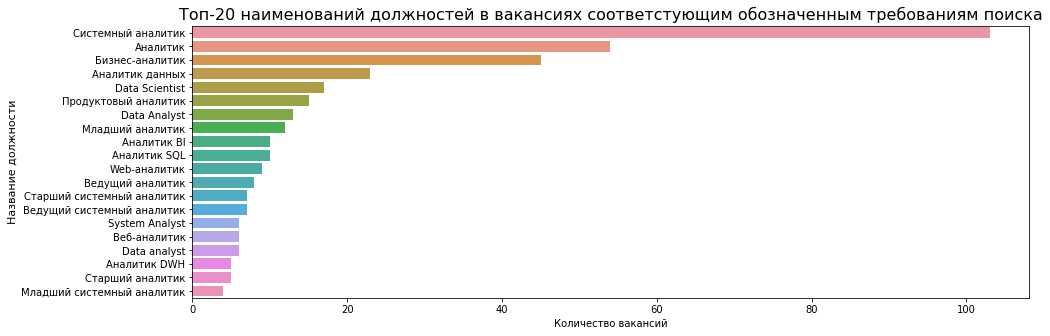

In [24]:
# Гистограмма топ-20 наименований должностей

name = (vacancy_df_to3years['name']).value_counts().head(20)

plt.figure(figsize=(15,5))
sns.barplot(y=name.index,x=name)
plt.xlabel('Количество вакансий')
plt.ylabel('Название должности', fontsize=11)
plt.title('Топ-20 наименований должностей в вакансиях соответстующим обозначенным требованиям поиска', fontsize=16)

Text(0.5, 1.0, 'Топ-20 компаний с вакансиями соответстующими обозначенным требованиям поиска')

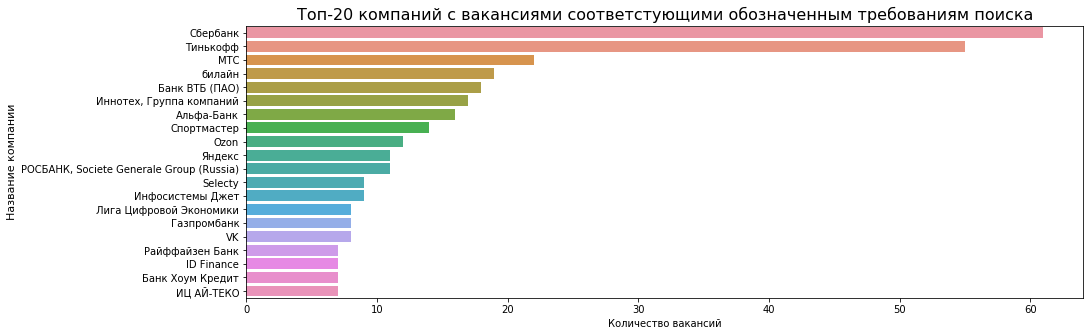

In [25]:
# Гистограмма топ-20 компаний

vacancy = (vacancy_df_to3years['employer_name']).value_counts().head(20)

plt.figure(figsize=(15,5))
sns.barplot(y=vacancy.index,x=vacancy)
plt.xlabel('Количество вакансий')
plt.ylabel('Название компании', fontsize=11)
plt.title('Топ-20 компаний с вакансиями соответстующими обозначенным требованиям поиска', fontsize=16)

Text(0.5, 1.0, 'Топ-20 департаментов с вакансиями соответстующими обозначенным требованиям поиска')

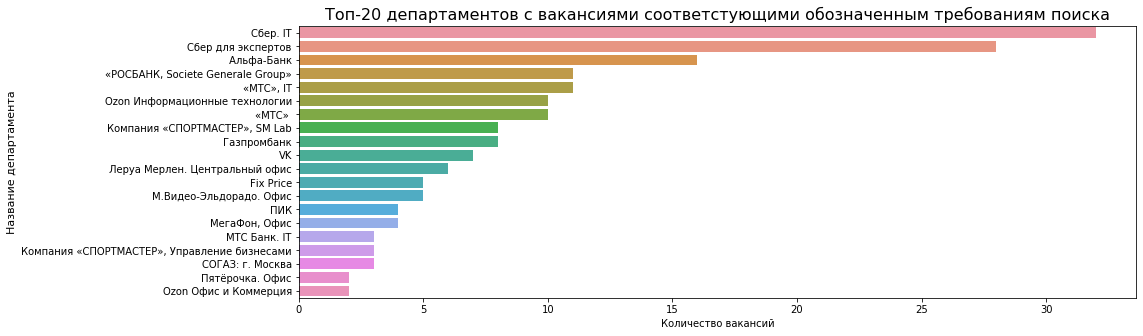

In [26]:
# Гистограмма топ-20 подразделений

department = (vacancy_df_to3years['department_name']).value_counts().head(20)

plt.figure(figsize=(15,5))
sns.barplot(y=department.index,x=department)
plt.xlabel('Количество вакансий')
plt.ylabel('Название департамента', fontsize=11)
plt.title('Топ-20 департаментов с вакансиями соответстующими обозначенным требованиям поиска', fontsize=16)

Text(0.5, 1.0, 'Топ-20 названий метро с вакансиями соответстующими обозначенным требованиям поиска')

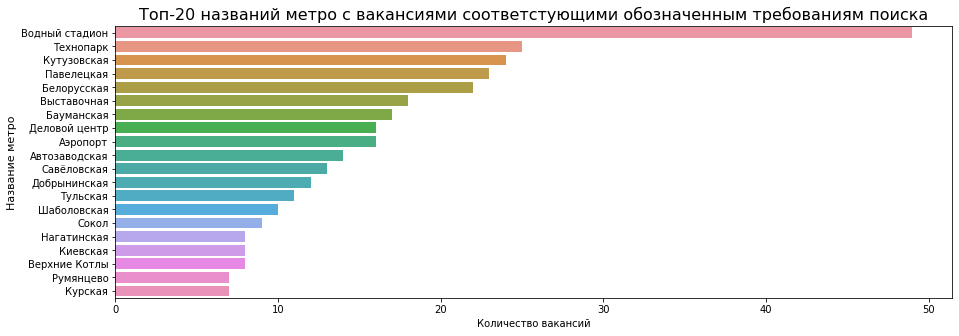

In [27]:
# Гистограмма топ-20 названий метро  
metro = (vacancy_df_to3years['station_name']).value_counts().head(20)

plt.figure(figsize=(15,5))
sns.barplot(y=metro.index,x=metro)
plt.xlabel('Количество вакансий')
plt.ylabel('Название метро', fontsize=11)
plt.title('Топ-20 названий метро с вакансиями соответстующими обозначенным требованиям поиска', fontsize=16)


# здесь надо поменять `metro_name` на `station_name` (выше проверка) ---> metro = (vacancy_df_to3years['metro_name']).value_counts().head(20)

Text(0.5, 1.0, 'Топ-20 названий улиц с вакансиями соответстующими обозначенным требованиям поиска')

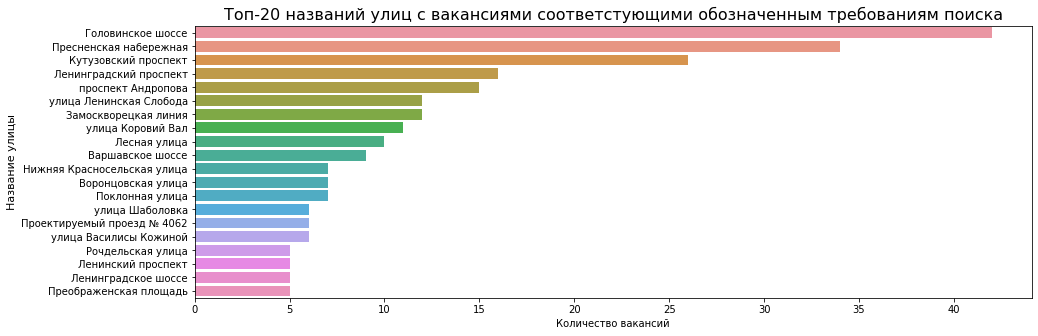

In [28]:
# Гистограмма топ-20 названий улиц

street = (vacancy_df_to3years['address_street']).value_counts().head(20)

plt.figure(figsize=(15,5))
sns.barplot(y=street.index,x=street)
plt.xlabel('Количество вакансий')
plt.ylabel('Название улицы', fontsize=11)
plt.title('Топ-20 названий улиц с вакансиями соответстующими обозначенным требованиям поиска', fontsize=16)

### Что с зарплатой?

In [29]:
# 87% вакансий без указания зарплаты

vacancy_df_to3years['salary_from'].isna().value_counts(normalize=True)

True     0.870638
False    0.129362
Name: salary_from, dtype: float64

In [30]:
# Минимальная/ максимальная/ средняя зарплаты по компании/ наименованию должности

salary_max=pd.pivot_table(vacancy_df_to3years,
               index=['employer_name', 'name'],
               values=['salary_to'], aggfunc = 'max').sort_values(by='salary_to', ascending=False).reset_index().head(10)

In [31]:
salary_max

,employer_name,name,salary_to
0,HR Prime,System analyst,440000.0
1,АЙТИ.СПЕЙС,Системный аналитик (интеграция),400000.0
2,Guavapay Limited,Системный/Бизнес аналитик,400000.0
3,HR Prime,Системный аналитик,350000.0
4,HR Prime,Системный Аналитик / Ведущий системный аналитик,350000.0
5,Леруа Мерлен,Data Scientist (Middle),330000.0
6,HR Prime,Системный Аналитик/System Analyst,320000.0
7,Галлямов Раиль Нафисович,Системный аналитик,300000.0
8,КАЗАНЬЭКСПРЕСС,Продуктовый аналитик,300000.0
9,РТ КИС,Системный/бизнес аналитик (middle/senior),300000.0


In [32]:
# Минимальная

salary_min=pd.pivot_table(vacancy_df_to3years,
               index=['employer_name', 'name'],
               values=['salary_from'], aggfunc = 'min').sort_values(by='salary_from', ascending=False).reset_index().tail(10)

In [33]:
salary_min

,employer_name,name,salary_from
142,ПроКонтекст,Помощник аналитика,50000.0
143,Леруа Мерлен,Практикант продуктовый аналитик,45000.0
144,Леруа Мерлен,Практикант аналитик ВЭД,45000.0
145,BAT Russia,Стажер-аналитик в финансовый отдел,41320.0
146,OMNINET,Младший консультант / Аналитик (автоматизация ...,40000.0
147,Платформа ОФД,Младший аналитик (Brand Search),40000.0
148,REMONT.IO,Junior web-analyst/Младший веб-аналитик,40000.0
149,DAIMLER KAMAZ RUS,Аналитик-стажер,30000.0
150,EnglishDom,Marketing analyst,2000.0
151,App in the Air,Middle Data Scientist,1500.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

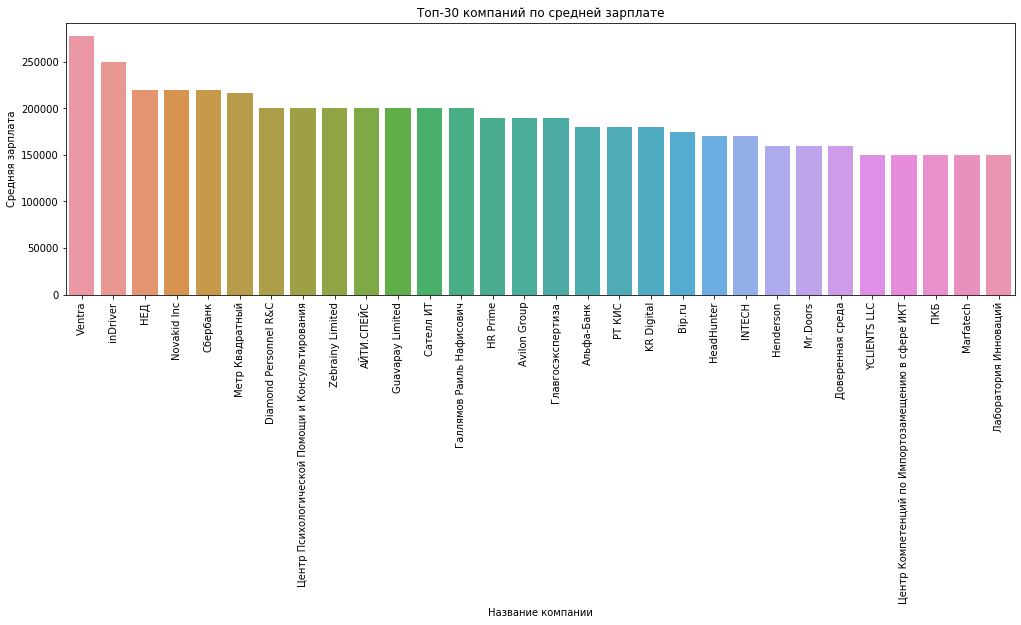

In [34]:
# Топ-30 компаний_Средняя зарплата

salary_mean_emp = vacancy_df_to3years.pivot_table(index='employer_name', values='salary_from', aggfunc='mean').sort_values(by='salary_from', ascending=False).head(30)

plt.figure(figsize=(17,5))
sns.barplot(x=salary_mean_emp.index,y=salary_mean_emp['salary_from'])
plt.title('Топ-30 компаний по средней зарплате')
plt.xlabel("Название компании")
plt.ylabel("Средняя зарплата")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

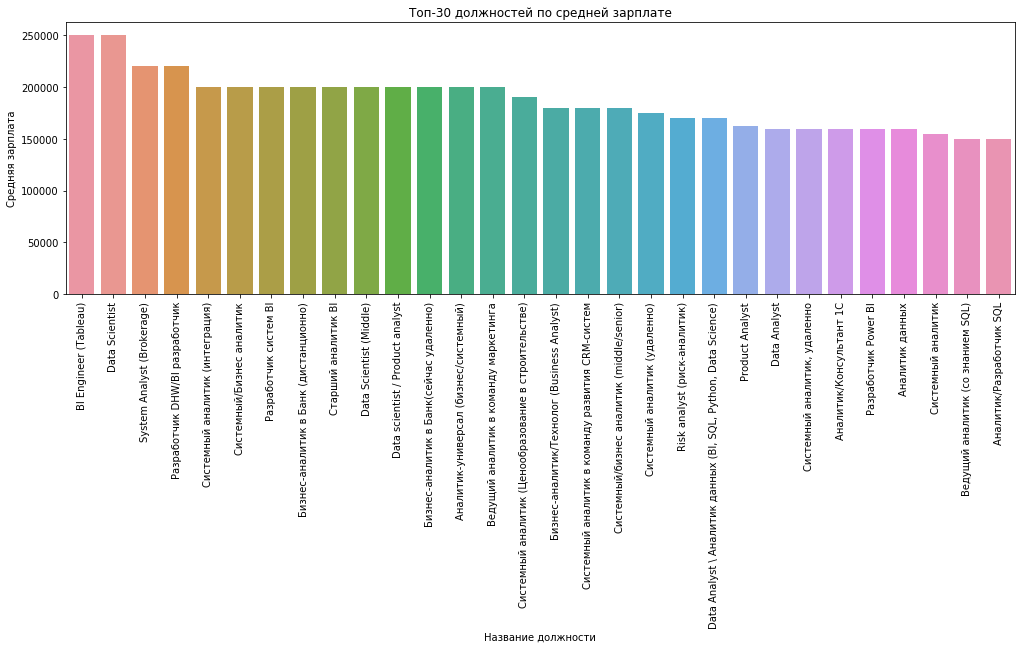

In [35]:
# Топ-30 должностей_Средняя зарплата

salary_mean_n = vacancy_df_to3years.pivot_table(index='name', values='salary_from', aggfunc='mean').sort_values(by='salary_from', ascending=False).head(30)

plt.figure(figsize=(17,5))
sns.barplot(x=salary_mean_n.index,y=salary_mean_n['salary_from'])
plt.title('Топ-30 должностей по средней зарплате')
plt.xlabel("Название должности")
plt.ylabel("Средняя зарплата")
plt.xticks(rotation=90)

In [36]:
vacancy_df_to3years.head(1)

# Пример ссылки на hh по id- постоянно меняется!!!
# https://hh.ru/vacancy/52059152

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer_name,department_name,salary_from,salary_to,city,metro_name,station_name,line_name,address_street,responses
0,52059152,False,Системный аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Преображенская п...",...,ЭЛТ-ПОИСК,NaN,NaN,NaN,Москва,None,NaN,NaN,Преображенская площадь,18


In [37]:
# Срез по компании (на примере сбербанк)

vacancy_df_to3years.dropna(subset=['employer_name', 'salary_from'])[vacancy_df_to3years['employer_name'].str.lower().str.contains('сбербанк')]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,employer_name,department_name,salary_from,salary_to,city,metro_name,station_name,line_name,address_street,responses
1333,51209457,False,System Analyst (Brokerage),"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 220000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,Сбербанк,Сбер для экспертов,220000.0,NaN,Москва,NaN,NaN,NaN,NaN,0


### Посмотрим содержание вакансий

In [38]:
vacs_df=vacancy_df_to3years.copy().reset_index(drop=True)

In [39]:
# Вывод вакансий в виде ссылок

vacs_df['url']

0       https://api.hh.ru/vacancies/52059152?host=hh.ru
1       https://api.hh.ru/vacancies/51718326?host=hh.ru
2       https://api.hh.ru/vacancies/49832942?host=hh.ru
3       https://api.hh.ru/vacancies/51039267?host=hh.ru
4       https://api.hh.ru/vacancies/52264165?host=hh.ru
                             ...                       
1170    https://api.hh.ru/vacancies/50497173?host=hh.ru
1171    https://api.hh.ru/vacancies/52244891?host=hh.ru
1172    https://api.hh.ru/vacancies/52288615?host=hh.ru
1173    https://api.hh.ru/vacancies/52160191?host=hh.ru
1174    https://api.hh.ru/vacancies/44141540?host=hh.ru
Name: url, Length: 1175, dtype: object

In [40]:
# Вывод вакансий в виде словаря

json.loads(requests.get('https://api.hh.ru/vacancies/52059152?host=hh.ru').text)

{'id': '52059152',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Системный аналитик',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1',
  'name': 'Москва',
  'url': 'https://api.hh.ru/areas/1?host=hh.ru'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Преображенская площадь',
  'building': '8',
  'description': None,
  'lat': 55.7950048602,
  'lng': 37.7128710086,
  'raw': 'Москва, Преображенская площадь, 8',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p> </p> <p><strong>Вам предстоит</strong> <strong>заниматься:</strong></p> <ul> <li>С

In [41]:
# Вывод вакансий в читаемом виде

HTML(json.loads(requests.get('https://api.hh.ru/vacancies/52059152?host=hh.ru').text)['description'])

In [42]:
# Вывод лимитированного списка вакансий (до 20 строк)

vacs_df_20 = vacs_df[:20]

In [43]:
# Выгрузка HTML-объекта по каждой вакансии из списка

vacs = vacs_df_20['url'].apply(lambda x: HTML(json.loads(requests.get(x).text)['description']))

In [44]:
vacs

0     <IPython.core.display.HTML object>
1     <IPython.core.display.HTML object>
2     <IPython.core.display.HTML object>
3     <IPython.core.display.HTML object>
4     <IPython.core.display.HTML object>
5     <IPython.core.display.HTML object>
6     <IPython.core.display.HTML object>
7     <IPython.core.display.HTML object>
8     <IPython.core.display.HTML object>
9     <IPython.core.display.HTML object>
10    <IPython.core.display.HTML object>
11    <IPython.core.display.HTML object>
12    <IPython.core.display.HTML object>
13    <IPython.core.display.HTML object>
14    <IPython.core.display.HTML object>
15    <IPython.core.display.HTML object>
16    <IPython.core.display.HTML object>
17    <IPython.core.display.HTML object>
18    <IPython.core.display.HTML object>
19    <IPython.core.display.HTML object>
Name: url, dtype: object

In [45]:
# Добавление кнопки "Click Me", очистка вакансий при переборе, переход по текстовому формату вакансии и смена вакансий при нажатии кнопки

button = widgets.Button(description="Click Me")
output = widgets.Output()

display(button, output)

counter=0
def on_clicked(b):
    with output:
        try:
            global counter
            clear_output()
            print('№ вакансии', counter)
            
            display(HTML("<h1>" + str(vacs_df['name'][counter]) + ' в ' + str(vacs_df['employer_name'][counter]) + "</h1>"))
            
            display(vacs[counter])
            display(HTML('<a href="' + str(vacs_df['alternate_url'][counter]) + '" target="_blank">Ссылка на вакансию</a>'))      
            counter += 1
        except Exception as e:
            ('Вакансии закончились')
            
button.on_click(on_clicked)                  

Button(description='Click Me', style=ButtonStyle())

Output()

С помощью библиотеки BeautifulSoup извлечем данные из HTML

In [46]:
from bs4 import BeautifulSoup

text = vacs_df_20['url'].apply(lambda x: BeautifulSoup(json.loads(requests.get(x).text)['description']).get_text())

In [47]:
text[0]

'  Вам предстоит заниматься:  Сбором и анализом требований, их детализацией и систематизацией; Системным анализом и описанием протоколов интеграции; Проектированием компонент ИТ-систем в рамках существующих архитектурных принципов; Формированием постановок задач на разработку ПО; Настройкой интеграционного взаимодействия c партнерами (в основном web-сервисы); Разработкой проектной технической документации.  Что для нас важно:  Понимание принципов интеграционного взаимодействия компонент в интеграционной архитектуре (протоколы SOAP, REST, язык SQL и инструменты работы с ними); Архитектура интеграционных сервисов; Опыт работы в команде с использованием инструментов коллективной работы (Jira, Redmine или аналогичные); Коммуникативные навыки, умение работать в кросс функциональной команде; Системное мышление, аналитический склад ума, умение структурно излагать мысли, внимание к деталям; Умение выстраивать отношения с заказчиками и командой (в офисе и дистанционно).  Будет плюсом:  Понимани